# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading data

In [2]:
iris=pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x=iris.iloc[:,1:]

In [4]:
x=pd.get_dummies(x,drop_first=True)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


# Detecting the optimum number of clusters

In [5]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i)
    model.fit(x)
    wcss.append(model.inertia_)
wcss

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[747.4910666666667,
 203.65250340400698,
 88.29042000800321,
 67.53485555555557,
 51.32676473429952,
 43.00493868394086,
 35.5115809983897,
 31.818896209775776,
 29.047555477131567,
 27.2898190100856]

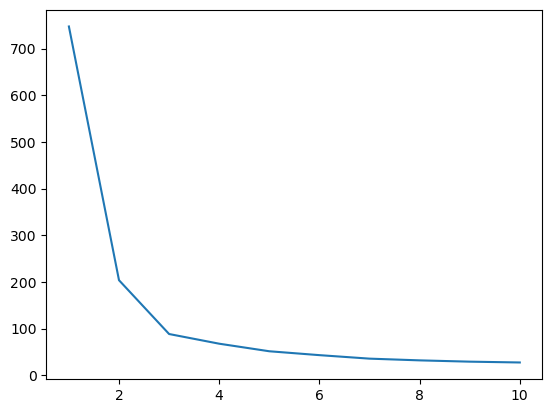

In [6]:
plt.plot(range(1,11),wcss)

# Visualizing clusters and centroids

In [7]:
model=KMeans(n_clusters=3)
model.fit(x)

KMeans(n_clusters=3)

In [9]:
x['kmeans_3']=model.labels_
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica,kmeans_3
0,5.1,3.5,1.4,0.2,0,0,1
1,4.9,3.0,1.4,0.2,0,0,1
2,4.7,3.2,1.3,0.2,0,0,1
3,4.6,3.1,1.5,0.2,0,0,1
4,5.0,3.6,1.4,0.2,0,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1,0
146,6.3,2.5,5.0,1.9,0,1,0
147,6.5,3.0,5.2,2.0,0,1,0
148,6.2,3.4,5.4,2.3,0,1,0


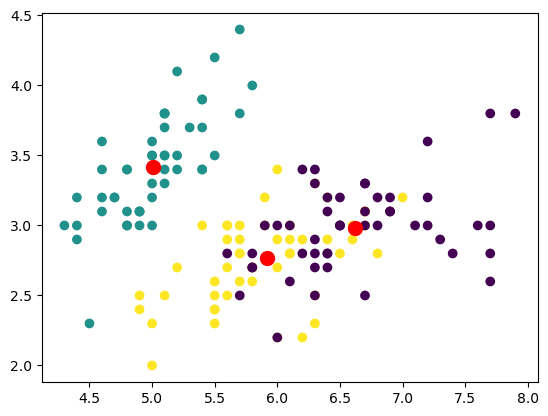

In [11]:
plt.scatter(x=x['SepalLengthCm'],y=x['SepalWidthCm'],c=x['kmeans_3'])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'r', label = 'Centroids')